In [95]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time
from numpy import loadtxt

In [96]:
#writing the basis
gs1=basis(13,0)
gs2=basis(13,1)
gs3=basis(13,2)
g1=basis(13,3)
g2=basis(13,4)
g3=basis(13,5)
g4=basis(13,6)
g5=basis(13,7)
e1=basis(13,8)
e2=basis(13,9)
e3=basis(13,10)
e4=basis(13,11)
e5=basis(13,12)
gamma=1.0e4 #according to measurments, in MHz

In [97]:
densities= loadtxt("densities1.txt");
densities.sort()
contrasts=[]

In [98]:
B=0.2 #magnetic field in Gauss
HFS=2*np.pi*6834 # hyperfine frequency in 2pi MHz
A=0.7*B #zeeman energy splitting in MHz
Etrans=2*np.pi*377107568 #Transition frequency in 2Pi MHz

options = Options()
options.rtol=1e-5
options.atol=1e-7
options.nsteps=500000
options.method='bdf'

L=0.006; #vapor cell length in meters.
grains=100; #number of calculation steps.
zz=np.linspace(0,L,grains)
grainSize=zz[2]-zz[1]
absCoeff=2.168e-13

In [99]:
#initial state and initial rabi frequencies
init=0.125*gs1*gs1.dag()+0.125*gs2*gs2.dag()+0.125*g1*g1.dag()+0.125*g2*g2.dag()+0.125*g3*g3.dag()+0.125*g4*g4.dag()+0.125*g5*g5.dag()
rabi1init=1 #in MHz
rabi2init=rabi1init
deltalist = np.linspace(-0.01,0.01,1000)
smalldeltalist=np.array([8e-3,0]); #the first value is the off-resonant detuning the second is zero (on resonance)
#
#
numDecayChannels=40;
gamma=gamma/numDecayChannels;
#collapse operators 
collapse=[]
colE5g5=np.sqrt(gamma)*g5*e5.dag()
colE5g4=np.sqrt(gamma)*g4*e5.dag()
colE5gs1=np.sqrt(gamma)*gs1*e5.dag()
colE5gs2=np.sqrt(gamma)*gs2*e5.dag()
colE5gs3=np.sqrt(gamma)*gs3*e5.dag()
colE5g1=np.sqrt(gamma)*g1*e5.dag()
colE5g2=np.sqrt(gamma)*g2*e5.dag()
colE5g3=np.sqrt(gamma)*g3*e5.dag()
collapse.extend([colE5g5,colE5g4,colE5g3,colE5g2,colE5g1,colE5gs1,colE5gs2,colE5gs3])
#
colE4g5=np.sqrt(gamma)*g5*e4.dag()
colE4g4=np.sqrt(gamma)*g4*e4.dag()
colE4gs1=np.sqrt(gamma)*gs1*e4.dag()
colE4gs2=np.sqrt(gamma)*gs2*e4.dag()
colE4gs3=np.sqrt(gamma)*gs3*e4.dag()
colE4g1=np.sqrt(gamma)*g1*e4.dag()
colE4g2=np.sqrt(gamma)*g2*e4.dag()
colE4g3=np.sqrt(gamma)*g3*e4.dag()
collapse.extend([colE4g5,colE4g4,colE4g3,colE4g2,colE4g1,colE4gs1,colE4gs2,colE4gs3])
#
#
colE3g5=np.sqrt(gamma)*g5*e3.dag()
colE3g4=np.sqrt(gamma)*g4*e3.dag()
colE3gs1=np.sqrt(gamma)*gs1*e3.dag()
colE3gs2=np.sqrt(gamma)*gs2*e3.dag()
colE3gs3=np.sqrt(gamma)*gs3*e3.dag()
colE3g1=np.sqrt(gamma)*g1*e3.dag()
colE3g2=np.sqrt(gamma)*g2*e3.dag()
colE3g3=np.sqrt(gamma)*g3*e3.dag()
collapse.extend([colE3g5,colE3g4,colE3g3,colE3g2,colE3g1,colE3gs1,colE3gs2,colE3gs3])
#
colE2g5=np.sqrt(gamma)*g5*e2.dag()
colE2g4=np.sqrt(gamma)*g4*e2.dag()
colE2gs1=np.sqrt(gamma)*gs1*e2.dag()
colE2gs2=np.sqrt(gamma)*gs2*e2.dag()
colE2gs3=np.sqrt(gamma)*gs3*e2.dag()
colE2g1=np.sqrt(gamma)*g1*e2.dag()
colE2g2=np.sqrt(gamma)*g2*e2.dag()
colE2g3=np.sqrt(gamma)*g3*e2.dag()
collapse.extend([colE2g5,colE2g4,colE2g3,colE2g2,colE2g1,colE2gs1,colE2gs2,colE2gs3])
#
colE1g5=np.sqrt(gamma)*g5*e1.dag()
colE1g4=np.sqrt(gamma)*g4*e1.dag()
colE1gs1=np.sqrt(gamma)*gs1*e1.dag()
colE1gs2=np.sqrt(gamma)*gs2*e1.dag()
colE1gs3=np.sqrt(gamma)*gs3*e1.dag()
colE1g1=np.sqrt(gamma)*g1*e1.dag()
colE1g2=np.sqrt(gamma)*g2*e1.dag()
colE1g3=np.sqrt(gamma)*g3*e1.dag()
collapse.extend([colE1g5,colE1g4,colE1g3,colE1g2,colE1g1,colE1gs1,colE1gs2,colE1gs3])
#
dephaseConst=0.0001*gamma
dephaseColapse=dephaseConst*(e1*e1.dag()+e2*e2.dag())
#dephasing was not added in the model
#ground state relaxation 
gsRelaxationRate=1.8e-3 #ground stete relaxation rate in MHz

gsRelaxationChannels=9
gsRelaxationRate=gsRelaxationRate/gsRelaxationChannels
gsRelaxationCollapse1=np.sqrt(gsRelaxationRate)*(gs1)*g5.dag()
gsRelaxationCollapse2=np.sqrt(gsRelaxationRate)*(gs1)*g4.dag()
gsRelaxationCollapse3=np.sqrt(gsRelaxationRate)*(gs2)*g4.dag()
gsRelaxationCollapse4=np.sqrt(gsRelaxationRate)*(gs3)*g3.dag()
gsRelaxationCollapse5=np.sqrt(gsRelaxationRate)*(gs2)*g3.dag()
gsRelaxationCollapse6=np.sqrt(gsRelaxationRate)*(gs1)*g3.dag()
gsRelaxationCollapse7=np.sqrt(gsRelaxationRate)*(gs2)*g2.dag()
gsRelaxationCollapse8=np.sqrt(gsRelaxationRate)*(gs3)*g2.dag()
gsRelaxationCollapse9=np.sqrt(gsRelaxationRate)*(gs3)*g1.dag()
collapse.extend([gsRelaxationCollapse1,gsRelaxationCollapse2,gsRelaxationCollapse3,gsRelaxationCollapse4,gsRelaxationCollapse5,gsRelaxationCollapse6,gsRelaxationCollapse7,gsRelaxationCollapse8,gsRelaxationCollapse9])


In [100]:
#diagonal part of the hamiltonian
Hdiag1=A*gs2*gs2.dag()+2*A*gs3*gs3.dag()
Hdiag2=(HFS-A)*g1*g1.dag()+(HFS)*g2*g2.dag()+(HFS+A)*g3*g3.dag()+(HFS+2*A)*g4*g4.dag()+(HFS+3*A)*g5*g5.dag()
Hdiag3=(HFS+Etrans+A/3)*e1*e1.dag()+(HFS+Etrans+2*A/3)*e2*e2.dag()+(HFS+Etrans+A)*e3*e3.dag()+(HFS+Etrans+4*A/3)*e4*e4.dag()+(HFS+Etrans+5*A/3)*e5*e5.dag()
Hdiag=Hdiag1+Hdiag2+Hdiag3
hbar=1
            #Rotating frame contribution to diagonal exluding the Delta part:
Hrf=(g1*g1.dag()*(HFS)+g2*g2.dag()*(HFS)+g3*g3.dag()*(HFS)+g4*g4.dag()*(HFS)+g5*g5.dag()*(HFS)+e1*e1.dag()*(Etrans+HFS)+e2*e2.dag()*(Etrans+HFS)+e3*e3.dag()*(Etrans+HFS)+e4*e4.dag()*(Etrans+HFS)+e5*e5.dag()*(Etrans+HFS))*hbar






In [101]:
popgs1=[]
popgs2=[]
popgs3=[]
popg1=[]
popg2=[]
popg3=[]
popg4=[]
popg5=[]
pope1=[]
pope2=[]
pope3=[]
pope4=[]
pope5=[]
gs1e5=[]
gs2e4=[]
gs3e3=[]
g1e2=[]
g2e3=[]
g3e4=[]
g4e5=[]
popg5=[]
totAbs=[]
dOmega=0;
rabimat=np.zeros((len(smalldeltalist),len(zz)))
carrierAbs=np.linspace(0.7,0.6,len(densities))
ratios=[]

In [102]:
#calculations for the contrast. if not interested in the contrast, skip this part
k=0
for density in densities:
    j=0
    dOmega=0;
    for Delta in smalldeltalist:
        HdiagX=(g1*g1.dag()+g2*g2.dag()+g3*g3.dag()+g4*g4.dag()+g5*g5.dag()+0.5*e1*e1.dag()+0.5*e2*e2.dag()+0.5*e3*e3.dag()+0.5*e4*e4.dag()+0.5*e5*e5.dag())*hbar*Delta
        i=0
        rabi1=-rabi1init
        rabi2=-rabi1
        dOmega=0
        for dz in zz:
            rabi1=rabi1+(dOmega*grainSize)
            rabi2=-rabi1
            Hup=rabi1*(gs1*e5.dag()*(-1/np.sqrt(2))+gs2*e4.dag()*(-0.5)+gs3*e3.dag()*(-1/np.sqrt(12)))+rabi2*(g1*e2.dag()*np.sqrt(6)+g2*e3.dag()*0.5+g3*e4.dag()*0.5+g4*e5.dag()*np.sqrt(6))
            #Hup=rabi1*(gs1*e5.dag()*(1/np.sqrt(2))+gs2*e4.dag()*(0.5)+gs3*e3.dag()*(1/np.sqrt(12)))+rabi2*(g1*e2.dag()*np.sqrt(6)+g2*e3.dag()*0.5+g3*e4.dag()*0.5+g4*e5.dag()*np.sqrt(6))
            Hdown=Hup.dag()
            H0=hbar*(Hdown+Hup+Hdiag)-Hrf
            H=H0-HdiagX
            rho_ss = steadystate(H,collapse, method='eigen', use_rcm=True)
            totAbs=(rho_ss[0,12]*0.5+rho_ss[1,11]*0.25+rho_ss[2,10]*(1/12)+rho_ss[3,9]*(1/6)+rho_ss[4,10]*0.25+rho_ss[5,11]*0.25+rho_ss[6,12]*(1/6))
            dOmega=np.imag(totAbs)*absCoeff*density
            rabimat[j][i]=rabi1
            i+=1
        j+=1

    ratios.append((pow(rabimat[1][len(zz)-1],2)-pow(rabimat[0][len(zz)-1],2))/(pow(rabimat[0][len(zz)-1],2)+carrierAbs[k]*rabi1init*rabi1init))
    k+=1

In [103]:
temps = loadtxt("temps1.txt");
temps.sort()

Text(0.5, 1.0, 'Contrasts - 6 mm cell')

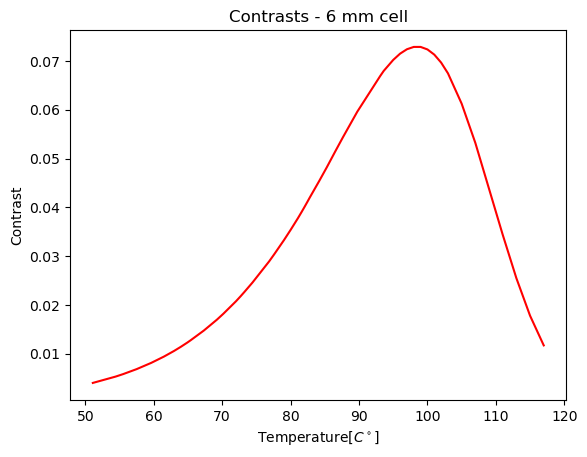

In [105]:
plt.plot(temps,ratios,'r')
plt.xlabel('Temperature[$C^\circ$]')
plt.ylabel('Contrast')
plt.title('Contrasts - 6 mm cell') #insert name..


In [50]:
#calculations of rho_steaty state vs detuning.
popgs1=[]
popgs2=[]
popgs3=[]
popg1=[]
popg2=[]
popg3=[]
popg4=[]
popg5=[]
pope1=[]
pope2=[]
pope3=[]
pope4=[]
pope5=[]
gs1e5=[]
gs2e4=[]
gs3e3=[]
g1e2=[]
g2e3=[]
g3e4=[]
g4e5=[]
popg5=[]
totAbs=[]
rabi1=-rabi1init
rabi2=-rabi1
Hup=rabi1*(gs1*e5.dag()*(-1/np.sqrt(2))+gs2*e4.dag()*(-0.5)+gs3*e3.dag()*(-1/np.sqrt(12)))+rabi2*(g1*e2.dag()*np.sqrt(6)+g2*e3.dag()*0.5+g3*e4.dag()*0.5+g4*e5.dag()*np.sqrt(6))
Hdown=Hup.dag()
H0=(Hdown+Hup+Hdiag)-Hrf
#H0=Hdown+Hup+Hdiag
for Delta in deltalist:
    Hdiag=(g1*g1.dag()+g2*g2.dag()+g3*g3.dag()+g4*g4.dag()+g5*g5.dag()+0.5*e1*e1.dag()+0.5*e2*e2.dag()+0.5*e3*e3.dag()+0.5*e4*e4.dag()+0.5*e5*e5.dag())*Delta
    H=H0-Hdiag
    rho_ss = steadystate(H,collapse)
    
# save values for plotting later:
    popgs1.append(rho_ss[0,0]) 
    popgs2.append(rho_ss[1,1]) 
    popgs3.append(rho_ss[2,2]) 
    popg1.append(rho_ss[3,3])
    popg2.append(rho_ss[4,4])
    popg3.append(rho_ss[5,5])
    popg4.append(rho_ss[6,6])
    popg5.append(rho_ss[7,7])
    pope1.append(rho_ss[8,8])
    pope2.append(rho_ss[9,9])
    pope3.append(rho_ss[10,10])
    pope4.append(rho_ss[11,11])
    pope5.append(rho_ss[12,12])
           # (some) coherences
    gs1e5.append(rho_ss[0,12])
    gs2e4.append(rho_ss[1,11])
    gs3e3.append(rho_ss[2,10])
    g1e2.append(rho_ss[3,9])
    g2e3.append(rho_ss[4,10])
    g3e4.append(rho_ss[5,11])
    g4e5.append(rho_ss[6,12])
    totAbs.append(rho_ss[0,12]+rho_ss[1,11]+rho_ss[2,10]+rho_ss[3,9]+rho_ss[4,10]+rho_ss[5,11]+rho_ss[6,12])


Text(0, 0.5, '$Im[\\chi] \\sim Absorbtion$')

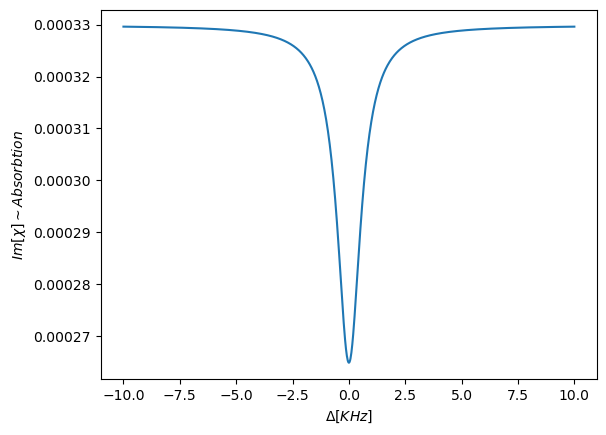

In [66]:
deltalistKHz=np.array(deltalist)*1000;
plt.plot(deltalistKHz,(np.imag(totAbs)))
plt.xlabel('$\Delta[KHz]$')
plt.ylabel('$Im[\chi] \sim Absorbtion$')
#ax.set_title('Multiple Plots on the Same Graph')